# **Diabetes** **Prediction**

**Importing** **libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



/Users/shahidali/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/shahidali/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


**Importing** **dataset**

In [2]:
dataset = pd.read_csv('diabetes.csv')

#### **Viewing** **the** **dataset**, its dimensions, features and statistical summary

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Detecting null values

In [7]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
dataset['Outcome'].value_counts().reset_index()


,Outcome,count
0,0,500
1,1,268


#### Data Visualization

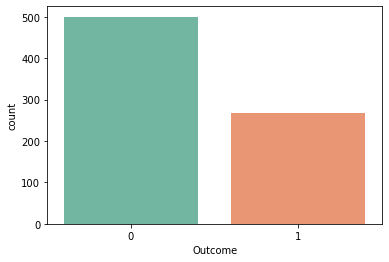

In [9]:
sns.countplot(x='Outcome', hue='Outcome', data=dataset, palette='Set2', legend=False)
plt.show()

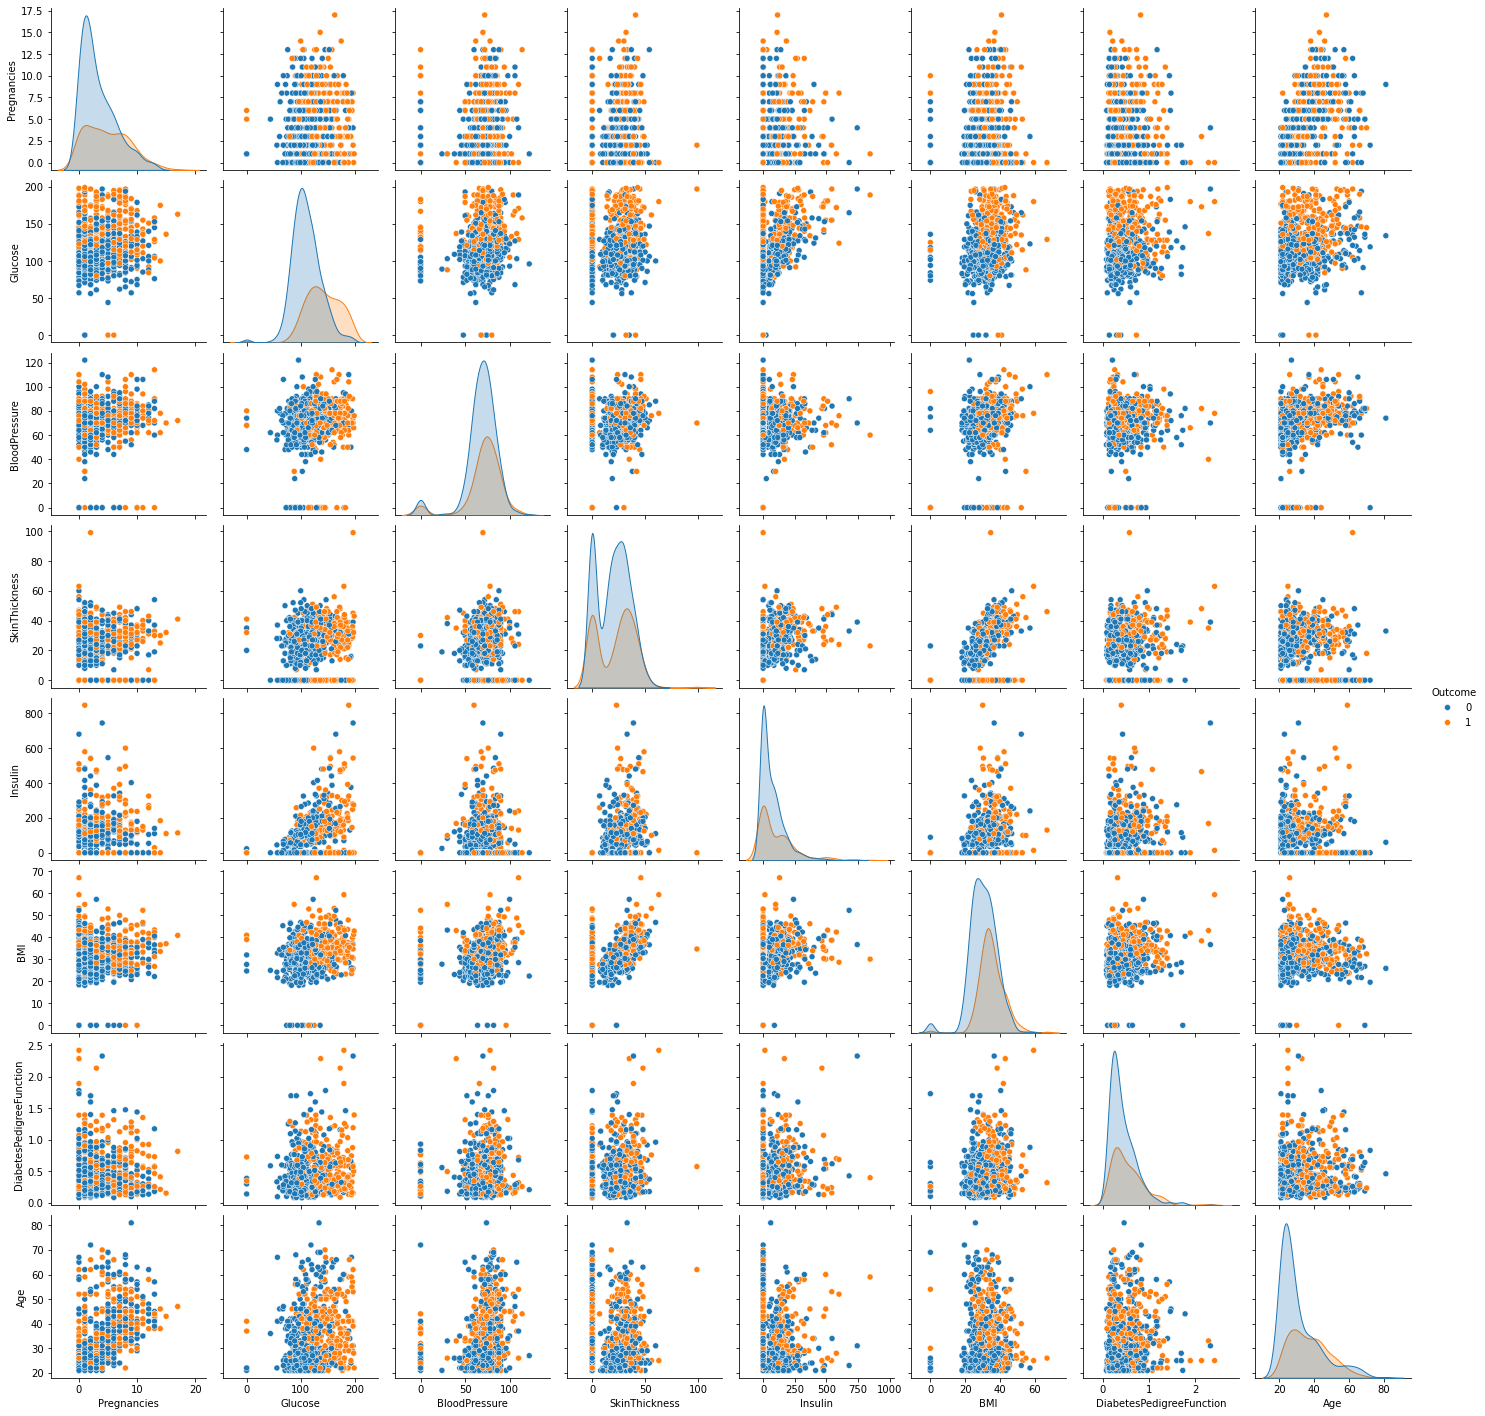

In [10]:
# Pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=dataset, hue='Outcome')
plt.show()


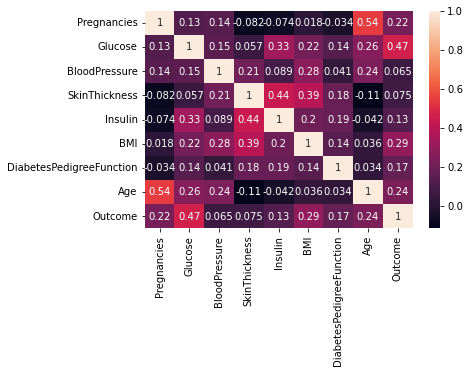

In [11]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

#### Processing the Data

In [12]:
# Replacing zero values with NaN
dataset_new = dataset
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [13]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Replacing NaN with mean values
dataset_new["Glucose"] = dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean())
dataset_new["BloodPressure"] = dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean())
dataset_new["BMI"] = dataset_new["BMI"].fillna(dataset_new["BMI"].mean())
dataset_new["SkinThickness"] = dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean())
dataset_new["Insulin"] = dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean())
dataset_new["Insulin"] = dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean())



In [15]:
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Splitting X and Y


In [16]:
y = dataset_new['Outcome']
X = dataset_new.drop('Outcome', axis=1)

In [17]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [19]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier





classifiers = {
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("-" * 60)



Classifier: Random Forest Classifier
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

------------------------------------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75       100
           1       0.53      0.46      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154

------------------------------------------------------------
Classifier: AdaBoost Classifier
Accuracy: 0.75
Classification Report:
         

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)
print(f"Classifier: {clf}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("-" * 60)



Classifier: RandomForestClassifier(random_state=42)
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

------------------------------------------------------------


In [21]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[87, 13],
       [20, 34]])

<AxesSubplot:>

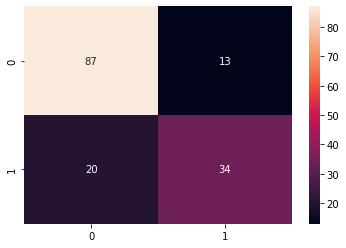

In [23]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy =accuracy_score(Y_test, y_pred)
accuracy

0.7857142857142857

#### Let's check whether the person have diabetes or not using some random values

In [26]:
y_pred = clf.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_pred)
if y_pred==1:
    print("Person has Diabetes")
else:
    print("Person has not  Diabetes")



[0]
Person has not  Diabetes


In [27]:
y_pred = clf.predict([[6,148,72,35,155.54,33.6,0.627,50]])
print(y_pred)
if y_pred==1:
    print("Person has Diabetes")
else:
    print("Person has not  Diabetes")


[1]
Person has Diabetes


In [28]:
print("Thanks")

Thanks
